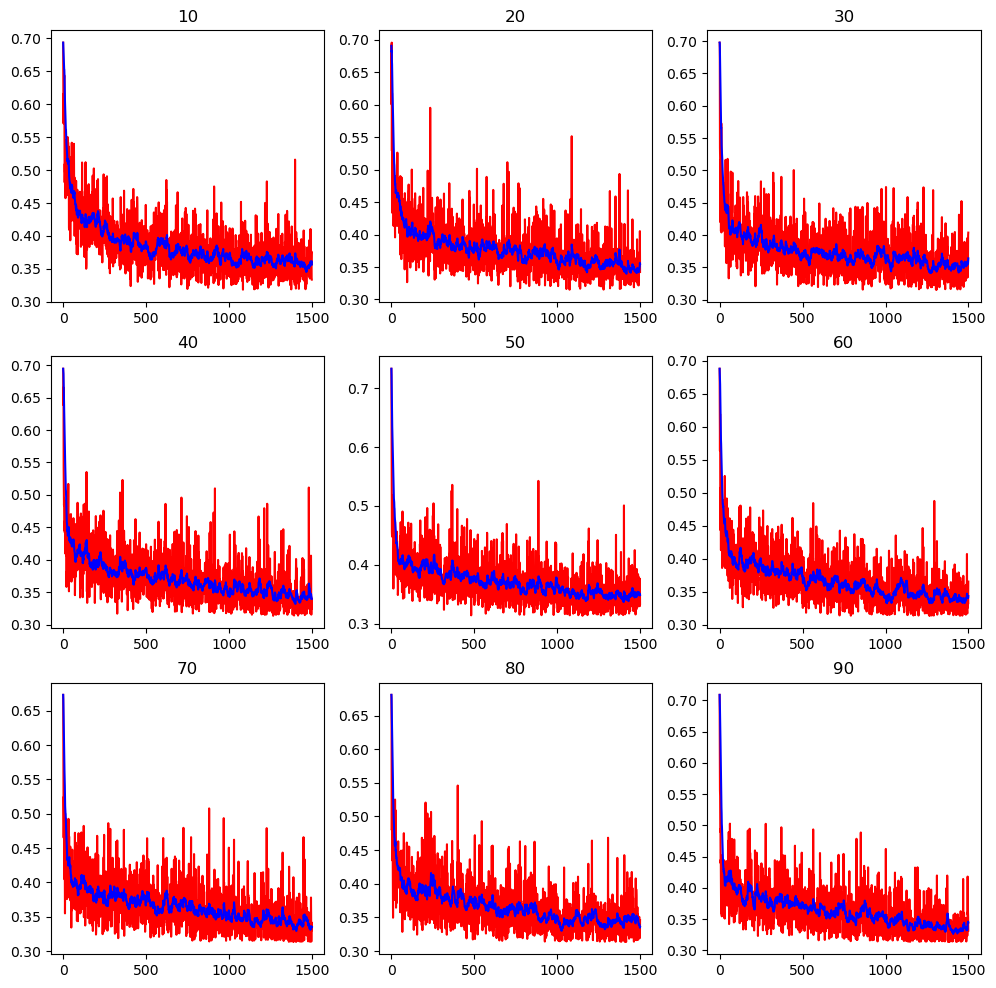

In [5]:
import torch
import matplotlib.pyplot as plt
import json
import numpy as np

with open('dataset/density_experiment/losses.json', 'r') as f:
    loss_dict = json.load(f)

means = list(loss_dict.keys())

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()

for i, mean in enumerate(means):
    losses = loss_dict[mean]
    losses = np.array(losses)
    ema = losses[0]
    emas = []
    for loss in losses:
        ema = ema * 0.9 + loss * 0.1
        emas.append(ema)

    axs[i].plot(losses, c='r')
    axs[i].plot(emas, c='b')
    axs[i].set_title(mean)

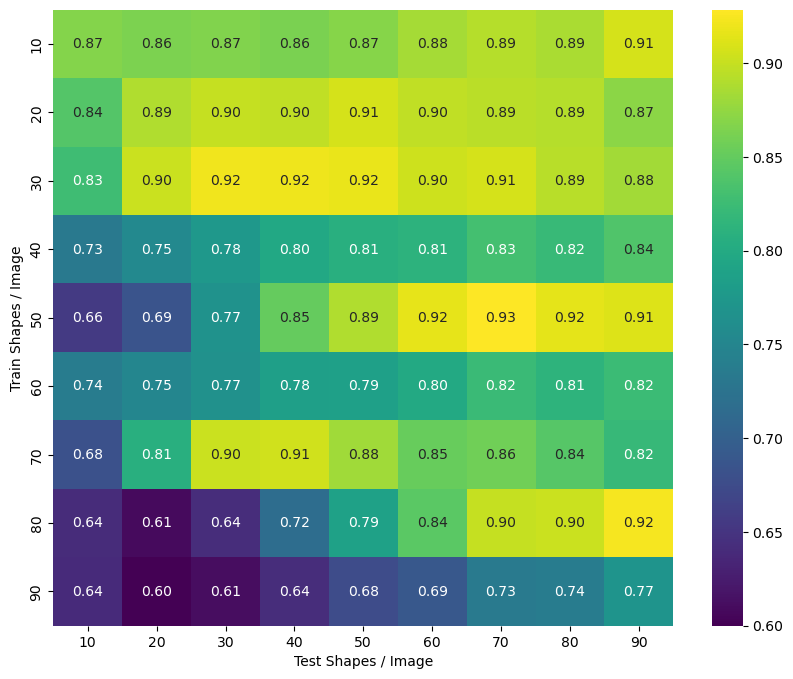

In [12]:
import json
import numpy as np

with open('dataset/density_experiment/evals.json', 'r') as f:
    eval_dict = json.load(f)

accs = np.zeros((9, 9))
means = list(eval_dict.keys())
for i, mean in enumerate(means):
    mean_accs = np.array(eval_dict[mean])
    accs[i, :] = mean_accs

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(accs, ax=ax, annot=True, fmt='.2f', cmap='viridis')
ax.set_xticklabels(means)
ax.set_xlabel('Test Shapes / Image')
ax.set_yticklabels(means)
ax.set_ylabel('Train Shapes / Image');